In [14]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                           balanced_accuracy_score, f1_score, precision_score, recall_score)
from sklearn.preprocessing import StandardScaler
import joblib

# Advanced ML libraries
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except ImportError:
    XGBOOST_AVAILABLE = False
    print("XGBoost not available. Install with: pip install xgboost")

try:
    import lightgbm as lgb
    LIGHTGBM_AVAILABLE = True
except ImportError:
    LIGHTGBM_AVAILABLE = False
    print("LightGBM not available. Install with: pip install lightgbm")

# Explainability
try:
    import shap
    SHAP_AVAILABLE = True
except ImportError:
    SHAP_AVAILABLE = False
    print("SHAP not available. Install with: pip install shap")

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"XGBoost available: {XGBOOST_AVAILABLE}")
print(f"LightGBM available: {LIGHTGBM_AVAILABLE}")
print(f"SHAP available: {SHAP_AVAILABLE}")

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/mac/Desktop/my_tasks/a_env/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <4ED95924-16D7-331E-8C6F-F25023ED13D1> /Users/mac/Desktop/my_tasks/a_env/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libomp/lib/libomp.dylib' (no such file)"]


In [5]:
X_train = pd.read_csv('week_12/X_train_scaled.csv')


In [6]:
# Load preprocessed datasets
print("LOADING PREPROCESSED DATA")

try:
    # Load preprocessed datasets
    X_train = pd.read_csv('week_12/X_train_scaled.csv')
    X_val = pd.read_csv('week_12/X_val_scaled.csv')
    X_test = pd.read_csv('week_12/X_test_scaled.csv')
    
    y_train = pd.read_csv('week_12/y_train.csv').squeeze()
    y_val = pd.read_csv('week_12/y_val.csv').squeeze()
    y_test = pd.read_csv('week_12/y_test.csv').squeeze()
    ### The .squeeze() method removes dimensions of size 1, converting a DataFrame to a Series
    ### The .squeeze() method is a clean, robust way to ensure your target variables are in the correct 1D format that sklearn expects, 
    ### preventing potential errors during model training and evaluation.
    
    # Load preprocessing objects
    scaler = joblib.load('week_12/scaler.pkl')
    selected_features = joblib.load('week_12/selected_features.pkl')
    
    print("...Preprocessed data loaded successfully!!....")
    print(f"Training set: {X_train.shape}")
    print(f"Validation set: {X_val.shape}")
    print(f"Test set: {X_test.shape}")
    
    # Display class distribution
    print("\nClass distribution:")
    print("Training set:")
    print(y_train.value_counts().sort_index())
    print("\nValidation set:")
    print(y_val.value_counts().sort_index())
    print("\nTest set:")
    print(y_test.value_counts().sort_index())
    
    # Display selected features
    print(f"\nSelected features ({len(selected_features)}):")
    for i, feature in enumerate(selected_features, 1):
        print(f"{i:2d}. {feature}")
        
except FileNotFoundError as e:
    print(f"Error loading preprocessed data: {e}")
    print("Please run the preprocessing notebook first to generate the required files.")
    print("Required files: X_train_scaled.csv, X_val_scaled.csv, X_test_scaled.csv")
    print("                y_train.csv, y_val.csv, y_test.csv")
    print("                scaler.pkl, selected_features.pkl")

LOADING PREPROCESSED DATA
...Preprocessed data loaded successfully!!....
Training set: (219, 8)
Validation set: (74, 8)
Test set: (74, 8)

Class distribution:
Training set:
Loan_Status
0    100
1    119
Name: count, dtype: int64

Validation set:
Loan_Status
0    33
1    41
Name: count, dtype: int64

Test set:
Loan_Status
0    38
1    36
Name: count, dtype: int64

Selected features (8):
 1. Married
 2. Dependents
 3. Education
 4. Self_Employed
 5. LoanAmount
 6. Property_Area
 7. ApplicantIncome_log
 8. LoanAmount_log


#### Baseline Model - Logistic Regression

In [37]:
# Baseline Logistic Regression model
print("BASELINE LOGISTIC REGRESSION MODEL")
print("EDA recommendation: Fast, interpretable baseline with coefficients for feature effect direction")

# Create and train baseline model
baseline_model = LogisticRegression(
    random_state=234,
    max_iter=1000,
    class_weight='balanced'  # Handle class imbalance as recommended by EDA
)

# Train the model
baseline_model.fit(X_train, y_train)

# Make predictions
y_train_pred = baseline_model.predict(X_train)
y_val_pred = baseline_model.predict(X_val)
y_test_pred = baseline_model.predict(X_test)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_balanced_acc = balanced_accuracy_score(y_train, y_train_pred)
val_balanced_acc = balanced_accuracy_score(y_val, y_val_pred)
test_balanced_acc = balanced_accuracy_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred, average='macro')
val_f1 = f1_score(y_val, y_val_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')



print(f"\nLogistic Regression Performance:")
print(f"Training - Accuracy: {train_accuracy:.3f}, Balanced Acc: {train_balanced_acc:.3f}, Macro F1: {train_f1:.3f}")
print(f"Validation - Accuracy: {val_accuracy:.3f}, Balanced Acc: {val_balanced_acc:.3f}, Macro F1: {val_f1:.3f}")
print(f"Test - Accuracy: {test_accuracy:.3f}, Balanced Acc: {test_balanced_acc:.3f}, Macro F1: {test_f1:.3f}")



baseline_model_results = {
    'model': 'Logistic Regression',
    'train_accuracy': round(train_accuracy,2),
    'val_accuracy': round(val_accuracy,2),
    'test_accuracy': round(test_accuracy,2),
    'train_balanced_acc': round(train_balanced_acc,2),
    'val_balanced_acc': round(val_balanced_acc,2),
    'test_balanced_acc': round(test_balanced_acc,2),
    'train_f1': round(train_f1,2),
    'val_f1': round(val_f1,2),
    'test_f1': round(test_f1,2)
}


BASELINE LOGISTIC REGRESSION MODEL
EDA recommendation: Fast, interpretable baseline with coefficients for feature effect direction

Logistic Regression Performance:
Training - Accuracy: 0.603, Balanced Acc: 0.598, Macro F1: 0.598
Validation - Accuracy: 0.473, Balanced Acc: 0.462, Macro F1: 0.461
Test - Accuracy: 0.554, Balanced Acc: 0.553, Macro F1: 0.552


#### 3. Random Forest Classifier

In [34]:
print("Random Forest Classifier")
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    random_state=234,
    class_weight='balanced',
    n_jobs = -1,
    n_estimators = 100
)

# Let's train our model

rf_model.fit(X_train,y_train)

y_train_pred_rf = rf_model.predict(X_train)
y_val_pred_rf = rf_model.predict(X_val)
y_test_pred_rf = rf_model.predict(X_test)


# Calculate our metrics

train_acc = accuracy_score(y_train,y_train_pred_rf)
val_acc = accuracy_score(y_val,y_val_pred_rf)
test_acc = accuracy_score(y_test,y_test_pred_rf)


train_acc_bal = balanced_accuracy_score(y_train,y_train_pred_rf)
val_acc_bal = balanced_accuracy_score(y_val,y_val_pred_rf)
test_acc_bal = balanced_accuracy_score(y_test,y_test_pred_rf)



f1_train_acc = f1_score(y_train,y_train_pred_rf)
f1_val_acc = f1_score(y_val,y_val_pred_rf)
f1_test_acc = f1_score(y_test,y_test_pred_rf)

print(f"\nAccuracy Score: Training {train_acc:.2f}, Validation {val_acc:.2f}, Test {test_acc:.2f}")
print(f"\nBalanced Accuracy Score: Training {train_acc_bal:.2f}, Validation {val_acc_bal:.2f}, Test {test_acc_bal:.2f}")
print(f"\nf1 Score: Training {f1_train_acc:.2f}, Validation {f1_val_acc:.2f}, Test {f1_test_acc:.2f}")




rf_results = {
    'model': 'Random Forest',
    'train_accuracy': round(train_acc,2),
    'val_accuracy': round(val_acc,2),
    'test_accuracy': round(test_acc,2),
    'train_balanced_acc': round(train_acc_bal,2),
    'val_balanced_acc': round(val_acc_bal,2),
    'test_balanced_acc': round(test_acc_bal,2),
    'train_f1': round(f1_train_acc,2),
    'val_f1': round(f1_val_acc,2),
    'test_f1': round(f1_test_acc,2)
}


Random Forest Classifier



Accuracy Score: Training 1.00, Validation 0.51, Test 0.50

Balanced Accuracy Score: Training 0.99, Validation 0.50, Test 0.50

f1 Score: Training 1.00, Validation 0.59, Test 0.54


In [ ]:
# # XGBoost Classifier
# print(".....XGBOOST CLASSIFIER....")
# print("EDA recommendation: Best performance for structured data, handles non-linearity and feature interactions automatically")

# xgb_model = xgb.XGBClassifier(
#         n_estimators=100,
#         random_state=42,
#         eval_metric='mlogloss',
#         n_jobs=-1
#     )
    
#     # Train the model (using encoded labels for XGBoost)
# xgb_model.fit(X_train, y_train)
    
#     # Make predictions
# y_train_pred_xgb = xgb_model.predict(X_train)
# y_val_pred_xgb = xgb_model.predict(X_val)
# y_test_pred_xgb = xgb_model.predict(X_test)
    
#     # Calculate metrics using original labels
# train_accuracy_xgb = accuracy_score(y_train, y_train_pred)
# val_accuracy_xgb = accuracy_score(y_val, y_val_pred)
# test_accuracy_xgb = accuracy_score(y_test, y_test_pred)
    
# train_balanced_acc_xgb = balanced_accuracy_score(y_train, y_train_pred)
# val_balanced_acc_xgb = balanced_accuracy_score(y_val, y_val_pred)
# test_balanced_acc_xgb = balanced_accuracy_score(y_test, y_test_pred)
    
# train_f1_xgb = f1_score(y_train, y_train_pred, average='macro')
# val_f1_xgb = f1_score(y_val, y_val_pred_xgb, average='macro')
# test_f1_xgb = f1_score(y_test, y_test_pred, average='macro')
    
# print(f"\nXGBoost Performance:")
# print(f"Training - Accuracy: {train_accuracy_xgb:.3f}, Balanced Acc: {train_balanced_acc_xgb:.3f}, Macro F1: {train_f1_xgb:.3f}")
# print(f"Validation - Accuracy: {val_accuracy_xgb:.3f}, Balanced Acc: {val_balanced_acc_xgb:.3f}, Macro F1: {val_f1_xgb:.3f}")
# print(f"Test - Accuracy: {test_accuracy_xgb:.3f}, Balanced Acc: {test_balanced_acc_xgb:.3f}, Macro F1: {test_f1_xgb:.3f}")
    

#### Model Comparison and Evaluation

In [38]:

print("MODEL COMPARISON AND EVALUATION")

# Collect all results
all_results = [baseline_model_results, rf_results]
# if xgb_results is not None:
#     all_results.append(xgb_results)

# Create comparison DataFrame
comparison_df = pd.DataFrame(all_results)
comparison_df = comparison_df.set_index('model')

print("\nModel Performance Comparison:")
print("=" * 80)
print(f"{'Model':<15} {'Train Acc':<10} {'Val Acc':<10} {'Test Acc':<10} {'Val F1':<10} {'Test F1':<10}")
print("=" * 80)
for _, row in comparison_df.iterrows():
    print(f"{row.name:<15} {row['train_accuracy']:<10.3f} {row['val_accuracy']:<10.3f} {row['test_accuracy']:<10.3f} {row['val_f1']:<10.3f} {row['test_f1']:<10.3f}")

# Find best model based on validation F1 score (EDA recommendation)
best_model_name = comparison_df['val_f1'].idxmax()
best_model_score = comparison_df.loc[best_model_name, 'val_f1']

# print(f"\nBest Model: {best_model_name} (Validation F1: {best_model_score:.3f})")


MODEL COMPARISON AND EVALUATION

Model Performance Comparison:
Model           Train Acc  Val Acc    Test Acc   Val F1     Test F1   
Logistic Regression 0.600      0.470      0.550      0.460      0.550     
Random Forest   1.000      0.510      0.500      0.590      0.540     


#### 6. Detailed Evaluation of Best Model

In [39]:
# Detailed evaluation of best model
print("DETAILED EVALUATION OF BEST MODEL")

# Get the best model
if best_model_name == 'Logistic Regression':
    best_model = baseline_model
    y_test_pred_best = y_test_pred
elif best_model_name == 'Random Forest':
    best_model = rf_model
    y_test_pred_best = y_test_pred_rf
# elif best_model_name == 'XGBoost':
#     best_model = xgb_model
#     y_test_pred_best = y_test_pred_xgb

print(f"Best Model: {best_model_name}")
print(f"Validation F1 Score : {best_model_score}")
# print(f"Validation F1 Score: {best_model_score:.3f}")


DETAILED EVALUATION OF BEST MODEL
Best Model: Random Forest
Validation F1 Score : 0.59


#### Visualization of the best model


Detailed Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.52      0.39      0.45        38
           1       0.49      0.61      0.54        36

    accuracy                           0.50        74
   macro avg       0.50      0.50      0.50        74
weighted avg       0.50      0.50      0.49        74


Confusion Matrix for Random Forest:
[[15 23]
 [14 22]]


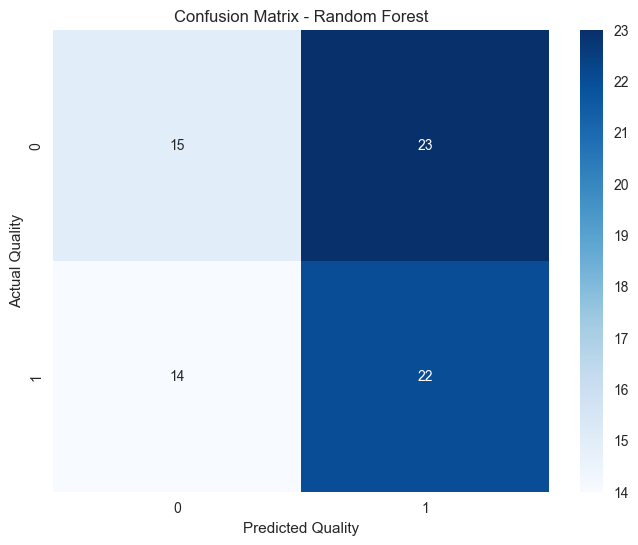


Per-class Performance for Random Forest:
Quality 0: 0.395 accuracy (38 samples)
Quality 1: 0.611 accuracy (36 samples)
...Detailed evaluation completed!


In [40]:

# Detailed classification report
print(f"\nDetailed Classification Report for {best_model_name}:")
print("=" * 60)
print(classification_report(y_test, y_test_pred_best))

# Confusion matrix
print(f"\nConfusion Matrix for {best_model_name}:")
cm = confusion_matrix(y_test, y_test_pred_best)
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y_test.unique()), 
            yticklabels=sorted(y_test.unique()))
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted Quality')
plt.ylabel('Actual Quality')
plt.show()

# Per-class performance
print(f"\nPer-class Performance for {best_model_name}:")
unique_classes = sorted(y_test.unique())
for class_label in unique_classes:
    class_mask = y_test == class_label
    if class_mask.sum() > 0:  # Only if class exists in test set
        class_accuracy = accuracy_score(y_test[class_mask], y_test_pred_best[class_mask])
        print(f"Quality {class_label}: {class_accuracy:.3f} accuracy ({class_mask.sum()} samples)")

print("...Detailed evaluation completed!")


In [42]:
# Save best model and results
print("SAVING BEST MODEL AND RESULTS ")

# Save the best model
joblib.dump(best_model, 'best_model.pkl')
print(f"- Best model ({best_model_name}) saved as 'best_model.pkl'")

# Save model comparison results
comparison_df.to_csv('model_comparison_results.csv')
print("- Model comparison results saved as 'model_comparison_results.csv'")

# Save detailed results
detailed_results = {
    'best_model': best_model_name,
    'best_model_score': best_model_score,
    'test_accuracy': comparison_df.loc[best_model_name, 'test_accuracy'],
    'test_balanced_acc': comparison_df.loc[best_model_name, 'test_balanced_acc'],
    'test_f1': comparison_df.loc[best_model_name, 'test_f1'],
    'confusion_matrix': cm.tolist(),
    # 'feature_importance': feature_importance_rf.to_dict('records') if best_model_name == 'Random Forest' else None
}

import json
with open('modeling_results.json', 'w') as f:
    json.dump(detailed_results, f, indent=2)
print("- Detailed results saved as 'modeling_results.json'")

# Save feature importance if available
# if hasattr(best_model, 'feature_importances_'):
#     feature_importance_best = pd.DataFrame({
#         'feature': X_train.columns,
#         # 'importance': best_model.feature_importances_
#     }).sort_values('importance', ascending=False)
    
    # feature_importance_best.to_csv('best_model_feature_importance.csv', index=False)
# print("- Best model feature importance saved as 'best_model_feature_importance.csv'")

print(f"\nMODELING SUMMARY")
print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {comparison_df.loc[best_model_name, 'test_accuracy']:.3f}")
print(f"Test Balanced Accuracy: {comparison_df.loc[best_model_name, 'test_balanced_acc']:.3f}")
print(f"Test Macro F1: {comparison_df.loc[best_model_name, 'test_f1']:.3f}")

print(f"\nFILES CREATED")
print("- best_model.pkl (trained model)")
print("- model_comparison_results.csv (performance comparison)")
print("- modeling_results.json (detailed results)")
if hasattr(best_model, 'feature_importances_'):
    print("- best_model_feature_importance.csv (feature importance)")

print(f"\nModeling phase completed successfully!")
print("... Ready for model deployment and production use")

SAVING BEST MODEL AND RESULTS 
- Best model (Random Forest) saved as 'best_model.pkl'
- Model comparison results saved as 'model_comparison_results.csv'
- Detailed results saved as 'modeling_results.json'

MODELING SUMMARY
Best Model: Random Forest
Test Accuracy: 0.500
Test Balanced Accuracy: 0.500
Test Macro F1: 0.540

FILES CREATED
- best_model.pkl (trained model)
- model_comparison_results.csv (performance comparison)
- modeling_results.json (detailed results)
- best_model_feature_importance.csv (feature importance)

Modeling phase completed successfully!
... Ready for model deployment and production use
